In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('ggplot')

from astropy.convolution import convolve, Box1DKernel, Gaussian1DKernel
import yaml

import import_ipynb
import func_analysis
import func_behavclass
import func_format

np.set_printoptions(precision = 3, suppress = True)

importing Jupyter notebook from func_analysis.ipynb
importing Jupyter notebook from func_behavclass.ipynb
importing Jupyter notebook from func_format.ipynb


In [30]:
ratID = 'Amygdala6'
date = '13042019'
neuron = '4A'

configpath = 'F:/'+ratID+'/Parameters_'+date+'.yml'
savepath = 'F:/'+'representativetraces/'

func_format.foldercheck(savepath)

[foldername, inttype, intcat, presentationnum, videosync_start, videosync_stop, framerate, framestouse, intsync_start, intsync_stop] = func_format.openconfig(configpath)

inttimes = np.vstack((intsync_start, intsync_stop)).T

spiketimes = np.load('F:/'+ratID+'/Electrophys/'+date+'/SpikeTimes/Neurons_rename/'+neuron+'.npy')/1000
smoothed_fr = func_analysis.firingrate(spiketimes, 1, spiketimes[0], spiketimes[-1], smooth=True, smoothkernel = np.sqrt(180))



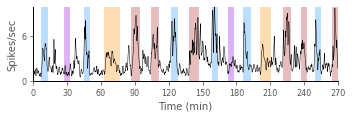

In [31]:

colorscheme = {'Male': 'dodgerblue', 'Object': 'darkviolet', 'Food': 'darkorange', 'Female': 'firebrick'}
fig, ax = plt.subplots(1, figsize = (5, 1.75))

ax.plot(smoothed_fr, color = 'k', lw = .5)
#ax.set_xlim(10200, 11000)

ax.set_xticks((0, 1800, 3600, 5400, 7200, 9000, 10800, 12600, 14400, 16200))
ax.set_xticklabels((0, 30, 60, 90, 120, 150, 180, 210, 240, 270), fontsize = 8)
for i, inttime in enumerate(inttimes):
    ax.axvspan(inttime[0], inttime[1], color = colorscheme[np.ravel(intcat)[i]], alpha = 0.3)
    #ax.vlines(inttime[1], 0, 20, alpha=0.3)
ax.set_ylim(0,10)
ax.set_yticks((0,6))
ax.set_yticklabels((0,6), fontsize = 8)
ax.set_xlim(0, 16200)
ax.set_xlabel('Time (min)', fontsize = 10)
ax.set_ylabel('Spikes/sec', fontsize = 10)

plt.tight_layout()
plt.grid(False)
ax.set_facecolor('white')
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig(savepath+'4Aday1.svg', format = 'svg', dpi = 300, transparent = True)

#plt.savefig('G:/aftereffect.svg', format = 'svg', dpi = 500, transparent = True)

#plt.savefig('F:/Figure3_New/14A_malesingletrace.svg', format = 'svg', dpi = 500, transparent = True)
#plt.savefig(savepath+'25Afemale_wholetrace.svg', format = 'svg', dpi = 500, transparent = True)

In [35]:
start = inttimes[1][0]
stop = inttimes[1][1]
intspikes = func_analysis.extractSpikes(spiketimes, start, stop)
basespikes = func_analysis.extractSpikes(spiketimes, start-300, start)

intfr = func_analysis.firingrate(intspikes, 1, start, stop, smooth=False)
basefr = func_analysis.firingrate(basespikes, 1, start-300, start, smooth=False)

[auROC, fpr, tpr] = func_analysis.calcROC(basefr, intfr)

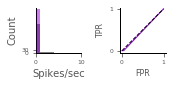

In [43]:
plt.rcParams['svg.fonttype'] = 'none'
fig, ax = plt.subplots(1, 2, figsize = (2.5, 1.3))

ax[0].hist(basefr, bins = np.arange(0,100), color = 'black', alpha = 0.5)
ax[0].hist(intfr, bins = np.arange(0,100), color = 'darkviolet', alpha = 0.5)
ax[0].spines['left'].set_color('black')
ax[0].spines['bottom'].set_color('black')
ax[1].plot(fpr, tpr, color = 'darkviolet', lw =1)
ax[1].plot((0,1), (0,1), color = 'black', linestyle = '--', lw = 1)
ax[1].spines['left'].set_color('k')
ax[1].spines['bottom'].set_color('black')
ax[1].set_facecolor('white')
ax[1].set_xlim(-.05, 1.05)
ax[1].set_ylim(-.05, 1.05)
ax[1].set_xticks((0,1))
ax[1].set_yticks((0,1))
ax[1].set_yticklabels((0,1), fontsize = 6)
ax[1].set_xticklabels((0,1), fontsize = 6)
ax[0].set_xlim((0,10))
ax[0].set_xticks((0, 10))
ax[0].set_xticklabels((0,10), fontsize = (6))
ax[0].set_ylabel('Count', fontsize = 10)
ax[0].set_yticks((0,30))
ax[0].set_yticklabels((0,30), fontsize = 6)
ax[0].set_xlabel('Spikes/sec', fontsize = 10)
ax[1].set_xlabel('FPR', fontsize = 8)
ax[1].set_ylabel('TPR', fontsize = 8)

ax[0].grid(False)
ax[1].grid(False)
ax[0].set_facecolor('white')
plt.tight_layout()

plt.savefig(savepath+'116Anoresponse_rocobject.svg', format = 'svg', dpi = 500, transparent = True)

In [39]:
start = inttimes[4][0]
stop = inttimes[4][1]
intspikes = func_analysis.extractSpikes(spiketimes, start, stop)
basespikes = func_analysis.extractSpikes(spiketimes, start-300, start)

intfr = func_analysis.firingrate(intspikes, 1, start, stop, smooth=False)
basefr = func_analysis.firingrate(basespikes, 1, start-300, start, smooth=False)

[auROC, fpr, tpr] = func_analysis.calcROC(basefr, intfr)

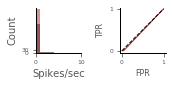

In [44]:
plt.rcParams['svg.fonttype'] = 'none'
fig, ax = plt.subplots(1, 2, figsize = (2.5, 1.3))

ax[0].hist(basefr, bins = np.arange(0,100), color = 'black', alpha = 0.5)
ax[0].hist(intfr, bins = np.arange(0,100), color = 'firebrick', alpha = 0.5)
ax[0].spines['left'].set_color('black')
ax[0].spines['bottom'].set_color('black')
ax[1].plot(fpr, tpr, color = 'firebrick', lw =1)
ax[1].plot((0,1), (0,1), color = 'black', linestyle = '--', lw = 1)
ax[1].spines['left'].set_color('k')
ax[1].spines['bottom'].set_color('black')
ax[1].set_facecolor('white')
ax[1].set_xlim(-.05, 1.05)
ax[1].set_ylim(-.05, 1.05)
ax[0].set_xlim(0,10)
ax[1].set_xticks((0,1))
ax[1].set_yticks((0,1))
ax[1].set_yticklabels((0,1), fontsize = 6)
ax[1].set_xticklabels((0,1), fontsize = 6)
ax[0].set_xticks((0, 10))
ax[0].set_xticklabels((0,10), fontsize = (6))
ax[0].set_ylabel('Count', fontsize = 10)
ax[0].set_yticks((0,30))
ax[0].set_yticklabels((0,30), fontsize = 6)
ax[0].set_xlabel('Spikes/sec', fontsize = 10)
ax[1].set_xlabel('FPR', fontsize = 8)
ax[1].set_ylabel('TPR', fontsize = 8)

ax[0].grid(False)
ax[1].grid(False)
ax[0].set_facecolor('white')
plt.tight_layout()

plt.savefig(savepath+'116Anoresponse_rocfemale.svg', format = 'svg', dpi = 500, transparent = True)

In [ ]:
behavioralvalues = np.loadtxt('F:/Amygdala6/TrackingData/13042019_rat1values.csv', delimiter = ',', dtype = str)

In [ ]:
plt.spines?

In [ ]:
plt.close()

fig, ax = plt.subplots(3, figsize = (10, 3), sharex = True)

#ax.plot((0, len(smoothed_fr)), (1,1), color = 'k', lw = 1)

for i, inttime in enumerate(inttimes):
    ax[0].plot((inttime[0]-240, inttime[1]+240), (1,1), color = 'k', lw =1)
    ax[0].vlines(inttime[0]-240, .99, 1.01, lw = 1)
    ax[0].vlines(inttime[1]+240, .99, 1.01, lw = 1)
    ax[0].axvspan(inttime[0], inttime[1], color = colorscheme[np.ravel(intcat)[i]], alpha = 0.3)
    
ax[0].set_ylim(.97,1.02)
ax[0].grid(False)
ax[0].set_yticks([])
#ax[0].set_xticks((0, 3600, 7200, 10800, 14400))
#ax[0].set_xticklabels((0, 1, 2, 3, 4))
ax[0].set_xlim(-100, inttime[1]+400)
ax[1].plot(np.array(behavioralvalues[0,1:], np.float), convolve(np.array(behavioralvalues[2,1:], np.float), Gaussian1DKernel(np.sqrt(40*300)), preserve_nan=True), lw = .5, color = 'k')

ax[1].set_ylim(0,10)
ax[1].set_xlim(-100,inttime[1]+400)

for i, inttime in enumerate(inttimes):
    ax[1].axvspan(inttime[0], inttime[1], color = colorscheme[np.ravel(intcat)[i]], alpha = 0.3)
    
ax[2].plot(np.array(behavioralvalues[0,1:], np.float), convolve(np.array(behavioralvalues[-1,1:], np.float), Gaussian1DKernel(np.sqrt(40*300)), preserve_nan=True), lw = .5, color = 'k')

for i, inttime in enumerate(inttimes):
    ax[2].axvspan(inttime[0], inttime[1], color = colorscheme[np.ravel(intcat)[i]], alpha = 0.3)
ax[2].set_ylim(0,10)

ax[1].grid(False)
ax[2].grid(False)
ax[0].set_facecolor('white')
ax[1].set_facecolor('white')
ax[2].set_facecolor('white')

ax[0].tick_params(bottom=None)
ax[1].tick_params(bottom=None)
ax[1].set_yticks((5,10))
ax[2].set_yticks((0,10))
ax[2].set_xticks((0, 3600, 7200, 10800, 14400))
ax[2].set_xticklabels((0, 1, 2, 3, 4))
ax[2].set_xlabel('Time (h)')
ax[2].set_ylabel('Stimulus \nVelocity', fontsize = 10)
ax[1].set_ylabel('Velocity', fontsize = 10)
#ax[0].set_ylabel('Trial \nStructure', fontsize = 10)
plt.subplots_adjust(hspace=.000000001)
plt.tight_layout()

plt.savefig('F:/FigurePlots/ExperimentalDesign.png', dpi = 300)

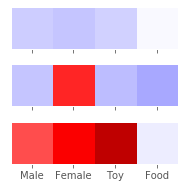

In [71]:
noresponse = np.array([-.10078, -.11303, -.09352, -.01154])
female = np.array([-.11083, 0.429358, -.13146, -.16811])
pan = np.array([.350322, .511459, .745358, -.03484])

fig, ax = plt.subplots(3, figsize = (3, 3), sharex = True, sharey = True)

a = ax[0].imshow(noresponse.reshape(1,-1), vmin = -1, vmax = 1, cmap = 'seismic')
ax[1].imshow(female.reshape(1,-1), vmin = -1, vmax = 1, cmap = 'seismic')
ax[2].imshow(pan.reshape(1,-1), vmin = -1, vmax = 1, cmap = 'seismic')

ax[0].grid(False)
ax[1].grid(False)
ax[2].grid(False)

ax[0].set_yticks([])

ax[2].set_xticks((0,1,2,3))
ax[2].set_xticklabels(('Male', 'Female', 'Toy', 'Food'))

plt.savefig(savepath+'heatmap_averageresponsescore_s3.svg', format = 'svg', dpi = 500, transparent = True)

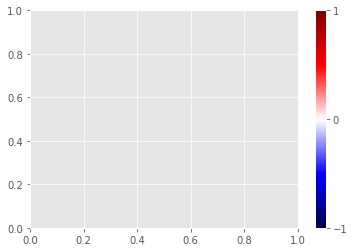

In [72]:
plt.colorbar(a, ticks = (-1, 0, 1))
plt.savefig(savepath+'colorbar_heatmap_s3.svg', format = 'svg', dpi = 500, transparent=True)

In [66]:
plt.colorbar?

Signature: plt.colorbar(mappable=None, cax=None, ax=None, **kw)
Docstring:
Add a colorbar to a plot.

Function signatures for the :mod:`~matplotlib.pyplot` interface; all
but the first are also method signatures for the
:meth:`~matplotlib.figure.Figure.colorbar` method::

  colorbar(**kwargs)
  colorbar(mappable, **kwargs)
  colorbar(mappable, cax=cax, **kwargs)
  colorbar(mappable, ax=ax, **kwargs)

Parameters
----------
mappable
    The `matplotlib.cm.ScalarMappable` (i.e., `~matplotlib.image.Image`,
    `~matplotlib.contour.ContourSet`, etc.) described by this colorbar.
    This argument is mandatory for the `.Figure.colorbar` method but optional
    for the `.pyplot.colorbar` function, which sets the default to the current
    image.

    Note that one can create a `ScalarMappable` "on-the-fly" to generate
    colorbars not attached to a previously drawn artist, e.g. ::

        fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)

cax : :class:`~matplotlib.axes.Axes` objec